In [49]:
using Agents
using Random
#using CairoMakie
using WGLMakie
using InteractiveDynamics
using Distances
using GeometryBasics
VERSION

v"1.9.0"

In [27]:
import Pkg
Pkg.status("Agents")

Status `~/.julia/environments/v1.9/Project.toml`
⌃ [46ada45e] Agents v5.16.0
Info Packages marked with ⌃ have new versions available and may be upgradable.


In [28]:
seed = 123
rand_rng = Random.MersenneTwister(seed);

In [29]:
@agent RandomWalker ContinuousAgent{2} begin
    in_danger_zone::Bool
end

In [30]:
function walkerStep!(agent, model)
    
    randomwalk!(agent,model,1)
    
end

walkerStep! (generic function with 1 method)

In [36]:
function sampleEdgePosition(width, height, threshold)
    edge = rand(1:4)  # Choose a random edge: 1 = top, 2 = right, 3 = bottom, 4 = left
    x, y = 0.0, 0.0

    if edge == 1
        x = rand(0.0:width-1)
        y = rand(0.0:threshold)
    elseif edge == 2
        x = rand(width - threshold:width-1)
        y = rand(0.0:height-1)
    elseif edge == 3
        x = rand(0.0:width-1)
        y = rand(height - threshold:height-1)
    else
        x = rand(0.0:threshold)
        y = rand(0.0:height-1)
    end

    return (x, y)
end

sampleEdgePosition (generic function with 1 method)

In [37]:
t = (20,20)
[sampleEdgePosition(t..., 1) for _ in 1:4]

4-element Vector{Tuple{Real, Float64}}:
 (19, 5.0)
 (19.0, 1.0)
 (19, 4.0)
 (0.0, 1.0)

In [38]:
extent = (20,20)

(20, 20)

In [39]:
function initializeWalkers(extent;walker_num=4 )
    
    spacing = 1
    space_2D = ContinuousSpace(extent, spacing=spacing, periodic = true)
    
    properties = Dict(:danger_radius => 3, :danger_center => (extent[1]/2,extent[2]/2) )

    model = ABM( RandomWalker, space_2D, rng=rand_rng, scheduler=Schedulers.Randomly(); properties )
    
    edge_distance = 2
    in_danger_zone_default = false
    for _ in 1:walker_num
           
        id_tmp = nextid( model )
        pos_tmp = sampleEdgePosition( extent..., edge_distance )
        vel_tmp = ( 0, 0 )
        agent = RandomWalker( id_tmp, pos_tmp, vel_tmp, in_danger_zone_default )
        add_agent_pos!( agent, model )
        
    end
    return model    
end

initializeWalkers (generic function with 1 method)

In [40]:
model = initializeWalkers(extent)

StandardABM with 4 agents of type RandomWalker
 space: periodic continuous space with (20.0, 20.0) extent and spacing=1.0
 scheduler: Agents.Schedulers.Randomly
 properties: danger_center, danger_radius

In [41]:
function modelStep!(agent, model)
    
    dist_to_center_tmp = evaluate( Euclidean(), agent.pos, model.danger_center )
    
    if( dist_to_center_tmp < model.danger_radius )
        agent.in_danger_zone = true
    else
        agent.in_danger_zone = false
    end    
end

modelStep! (generic function with 1 method)

In [42]:
function MakerType(agent)
    return :circle
end

MakerType (generic function with 1 method)

In [43]:
function ColorType(agent)
    if agent.in_danger_zone == true
        return :red
    else
        return :blue
    end    
end

ColorType (generic function with 1 method)

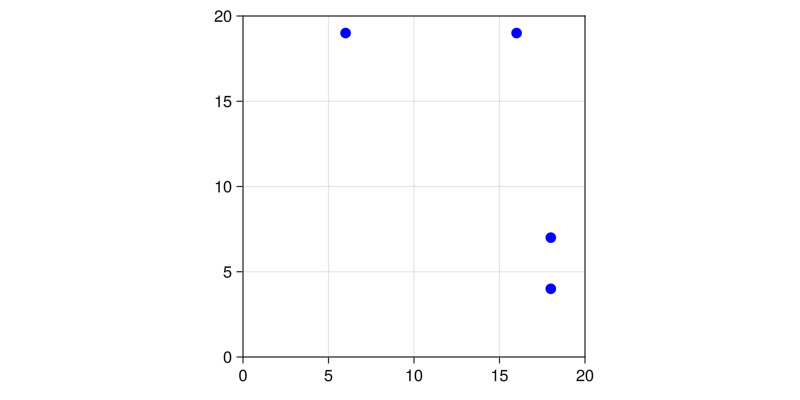

In [45]:
plotkwargs = (; ac=ColorType, am=MakerType)
fig, ax, abmobs = Agents.abmplot(model; plotkwargs..., figure = (; resolution=(800,400)) )
fig

In [55]:
plotkwargs = (; ac=ColorType, am=MakerType)
fig, ax, abmobs = Agents.abmplot(model; agent_step! = walkerStep!, model_step! = modelStep!,
                              plotkwargs..., figure = (; resolution=(800,400)) )

center = GLMakie.Point2f0( extent[1]/2, extent[2]/2 )

θ = LinRange(0, 2π, 100)  # Create 100 points from 0 to 2π
x = extent[1]/2 .+ model.danger_radius * cos.(θ)  # x-coordinates of the circle
y = extent[2]/2 .+ model.danger_radius * sin.(θ)  # y-coordinates of the circle

lines!(ax, x, y, color=:red, linewidth=1.5)

fig

In [16]:
#step!(model, walkerStep!, 1)

# Update the plot
update_abm_plot!(abmobs)

# Re-draw the custom circle
θ = LinRange(0, 2π, 100)  # Create 100 points from 0 to 2π
x = extent[1]/2 .+ model.danger_radius * cos.(θ)  # x-coordinates of the circle
y = extent[2]/2 .+ model.danger_radius * sin.(θ)  # y-coordinates of the circle
lines!(ax, x, y, color=:red, linewidth=1.5)

fig

UndefVarError: UndefVarError: `update_abm_plot!` not defined